# 0. Importation

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from linearmodels.iv import IV2SLS

In [75]:
df = pd.read_excel('DonneÌesBetB.xlsx')

# 1. Exploration

1. Biais de simulatanéité
2. Biais de variable omise
3. Biais d'erreur de mesure sur une variabel explicative (estimateur biaisé et non convergent OLS) => prendre un autre estimateur

minxp et rule endogène
corr entre lattitude et rule

Afrique et Moyent Orient
un avec rule et avec goveffect

In [76]:
# Première visualisation des données
df.head()

,country,afme,eurca,aoc,nam,csam,latitude,lnsubsoil_1994,lnsubsoil_2000,lnnatcap_1994,...,lhcpc,sxp,lallminpc,pres70s,maj70s,rule,goveffect,open5060s,lgdp70,g7000
0,Afghanistan,0,0,1,0,0,0.37,NaN,NaN,NaN,...,2.7792,NaN,-9.164920,1.0,NaN,-1.19,NaN,NaN,NaN,NaN
1,Albania,0,1,0,0,0,0.46,NaN,5.703783,NaN,...,NaN,NaN,-6.588818,1.0,NaN,-0.32,-0.31,NaN,NaN,NaN
2,Algeria,1,0,0,0,0,0.31,NaN,9.364777,NaN,...,6.5107,0.19,-4.787439,1.0,1.0,-0.62,-0.77,0.61612,6.778796,6.461267
3,Angola,1,0,0,0,0,0.14,NaN,NaN,NaN,...,5.7324,NaN,-5.083215,1.0,NaN,-1.44,-1.13,0.39657,6.873009,NaN
4,Antigua and Barbuda,0,0,0,0,1,0.19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# On supprime les lignes avec des valeurs manquantes sur g7000 (variable que l'on cherche à expliquer)
df.dropna(subset=["g7000"],inplace=True)

In [80]:
# On vient chercher les différentes colonnes de notre DataFrame
columns = df.columns
print(*columns,sep=', ')

country, afme, eurca, aoc, nam, csam, latitude, lnsubsoil_1994, lnsubsoil_2000, lnnatcap_1994, lnnatcap_2000, agrixp, minxp, natxp, lhcpc, sxp, lallminpc, pres70s, maj70s, rule, goveffect, open5060s, lgdp70, g7000


In [81]:
# On affiche les statistiques descriptives de notre DataFrame
df.describe()

,afme,eurca,aoc,nam,csam,latitude,lnsubsoil_1994,lnsubsoil_2000,lnnatcap_1994,lnnatcap_2000,...,lhcpc,sxp,lallminpc,pres70s,maj70s,rule,goveffect,open5060s,lgdp70,g7000
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,59.000000,72.000000,83.000000,93.000000,...,94.000000,90.000000,94.000000,100.000000,76.000000,99.000000,101.000000,99.000000,102.000000,102.000000
mean,0.411765,0.215686,0.147059,0.019608,0.205882,0.270784,5.793699,5.910861,8.467258,8.149843,...,0.524107,0.121667,-7.171198,0.640000,0.539474,0.231313,0.221881,0.489325,6.881456,5.613749
std,0.494583,0.413329,0.355914,0.139333,0.406342,0.195993,1.845187,2.768304,0.884188,1.137014,...,4.306644,0.093198,2.998771,0.482418,0.501751,1.027672,1.067070,0.350735,0.960757,1.853510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,2.302585,0.000000,6.779922,4.430817,...,-4.605200,0.010000,-16.393090,0.000000,0.000000,-1.590000,-1.550000,0.061750,5.188781,-0.303702
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,4.605170,4.023338,7.860924,7.321850,...,-4.605200,0.050000,-8.730334,0.000000,0.000000,-0.510000,-0.580000,0.264738,6.174286,4.548667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.215000,5.799093,6.167376,8.393895,8.161660,...,1.701200,0.100000,-6.822027,1.000000,1.000000,-0.120000,-0.110000,0.411350,6.807724,5.982004
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.407500,7.002900,8.112394,8.952723,8.878219,...,4.056050,0.170000,-4.848109,1.000000,1.000000,0.870000,0.880000,0.610404,7.612327,6.538301
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.720000,9.907977,10.816550,10.841340,10.911960,...,8.032400,0.540000,-1.553122,1.000000,1.000000,2.170000,2.510000,2.672050,8.677136,9.807096


In [82]:
# Première visualisation des données
df.head()

,country,afme,eurca,aoc,nam,csam,latitude,lnsubsoil_1994,lnsubsoil_2000,lnnatcap_1994,...,lhcpc,sxp,lallminpc,pres70s,maj70s,rule,goveffect,open5060s,lgdp70,g7000
2,Algeria,1,0,0,0,0,0.31,NaN,9.364777,NaN,...,6.5107,0.19,-4.787439,1.0,1.0,-0.62,-0.77,0.616120,6.778796,6.461267
5,Argentina,0,0,0,0,1,0.38,6.253829,8.087333,9.195227,...,4.5187,0.05,-6.324195,1.0,0.0,0.28,0.45,0.122590,7.927007,4.809399
7,Australia,0,0,1,0,0,0.30,9.113830,9.349319,10.472770,...,5.0642,0.10,-1.672493,0.0,1.0,1.89,1.96,0.314465,8.407646,6.010288
8,Austria,0,1,0,0,0,0.52,5.438079,6.184149,8.931949,...,2.8585,0.04,-7.559307,0.0,0.0,1.98,1.92,0.446490,8.141568,6.594900
12,Bangladesh,0,0,1,0,0,0.27,2.995732,4.418840,8.042378,...,2.4419,0.01,-9.919099,0.0,1.0,-0.68,-0.67,0.191264,5.797637,5.608288


In [83]:
# On supprime les lignes avec des valeurs manquantes sur g7000 (variable que l'on cherche à expliquer)
df.dropna(subset=["g7000"],inplace=True)

In [84]:
# On vient chercher les différentes colonnes de notre DataFrame
columns = df.columns
print(*columns,sep=', ')

country, afme, eurca, aoc, nam, csam, latitude, lnsubsoil_1994, lnsubsoil_2000, lnnatcap_1994, lnnatcap_2000, agrixp, minxp, natxp, lhcpc, sxp, lallminpc, pres70s, maj70s, rule, goveffect, open5060s, lgdp70, g7000


In [85]:
# On affiche les statistiques descriptives de notre DataFrame
df.describe()

,afme,eurca,aoc,nam,csam,latitude,lnsubsoil_1994,lnsubsoil_2000,lnnatcap_1994,lnnatcap_2000,...,lhcpc,sxp,lallminpc,pres70s,maj70s,rule,goveffect,open5060s,lgdp70,g7000
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,59.000000,72.000000,83.000000,93.000000,...,94.000000,90.000000,94.000000,100.000000,76.000000,99.000000,101.000000,99.000000,102.000000,102.000000
mean,0.411765,0.215686,0.147059,0.019608,0.205882,0.270784,5.793699,5.910861,8.467258,8.149843,...,0.524107,0.121667,-7.171198,0.640000,0.539474,0.231313,0.221881,0.489325,6.881456,5.613749
std,0.494583,0.413329,0.355914,0.139333,0.406342,0.195993,1.845187,2.768304,0.884188,1.137014,...,4.306644,0.093198,2.998771,0.482418,0.501751,1.027672,1.067070,0.350735,0.960757,1.853510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,2.302585,0.000000,6.779922,4.430817,...,-4.605200,0.010000,-16.393090,0.000000,0.000000,-1.590000,-1.550000,0.061750,5.188781,-0.303702
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,4.605170,4.023338,7.860924,7.321850,...,-4.605200,0.050000,-8.730334,0.000000,0.000000,-0.510000,-0.580000,0.264738,6.174286,4.548667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.215000,5.799093,6.167376,8.393895,8.161660,...,1.701200,0.100000,-6.822027,1.000000,1.000000,-0.120000,-0.110000,0.411350,6.807724,5.982004
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.407500,7.002900,8.112394,8.952723,8.878219,...,4.056050,0.170000,-4.848109,1.000000,1.000000,0.870000,0.880000,0.610404,7.612327,6.538301
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.720000,9.907977,10.816550,10.841340,10.911960,...,8.032400,0.540000,-1.553122,1.000000,1.000000,2.170000,2.510000,2.672050,8.677136,9.807096


In [73]:
corr = df.iloc[:,7:].corr()
corr

,lnsubsoil_1994,lnsubsoil_2000,lnnatcap_1994,lnnatcap_2000,agrixp,minxp,natxp,lhcpc,sxp,lallminpc,pres70s,maj70s,rule,goveffect,open5060s,lgdp70,g7000
lnsubsoil_1994,1.000000,0.861461,0.671312,0.781356,0.038199,0.398809,0.396219,0.610566,0.081058,0.787039,-0.165167,-0.069774,0.220118,0.225376,0.254948,0.381568,0.172334
lnsubsoil_2000,0.861461,1.000000,0.589232,0.737319,0.043748,0.417701,0.413777,0.756554,0.014063,0.683716,-0.172104,0.105833,0.183508,0.213323,0.167030,0.363312,0.352325
lnnatcap_1994,0.671312,0.589232,1.000000,0.857443,0.162137,0.216631,0.251109,0.363316,-0.060969,0.413419,-0.244681,-0.197367,0.413826,0.449404,-0.048069,0.518449,0.201379
lnnatcap_2000,0.781356,0.737319,0.857443,1.000000,0.144948,0.335999,0.357324,0.613195,-0.081744,0.510106,-0.200789,-0.273610,0.446899,0.453052,0.024142,0.599478,0.209089
agrixp,0.038199,0.043748,0.162137,0.144948,1.000000,0.180341,0.395329,-0.022487,0.212450,-0.178822,-0.107428,0.127179,0.092321,0.121328,0.459043,-0.030610,0.095877
minxp,0.398809,0.417701,0.216631,0.335999,0.180341,1.000000,0.974770,0.327264,0.378959,0.359474,0.077735,0.140230,-0.134036,-0.167445,0.514148,0.003406,-0.063472
natxp,0.396219,0.413777,0.251109,0.357324,0.395329,0.974770,1.000000,0.300876,0.402555,0.295965,0.048634,0.163020,-0.104083,-0.128720,0.584763,-0.003437,-0.037548
lhcpc,0.610566,0.756554,0.363316,0.613195,-0.022487,0.327264,0.300876,1.000000,-0.100410,0.610894,-0.110017,-0.014649,0.123109,0.151241,-0.138076,0.275391,0.244583
sxp,0.081058,0.014063,-0.060969,-0.081744,0.212450,0.378959,0.402555,-0.100410,1.000000,0.123468,0.203708,0.150245,-0.250674,-0.284579,0.356896,-0.155845,-0.397422
lallminpc,0.787039,0.683716,0.413419,0.510106,-0.178822,0.359474,0.295965,0.610894,0.123468,1.000000,-0.176546,-0.020658,0.211318,0.195866,-0.016327,0.388856,0.118628


Text(0.5, 1.0, 'Matrice de corrélation des variables du DataFrame')

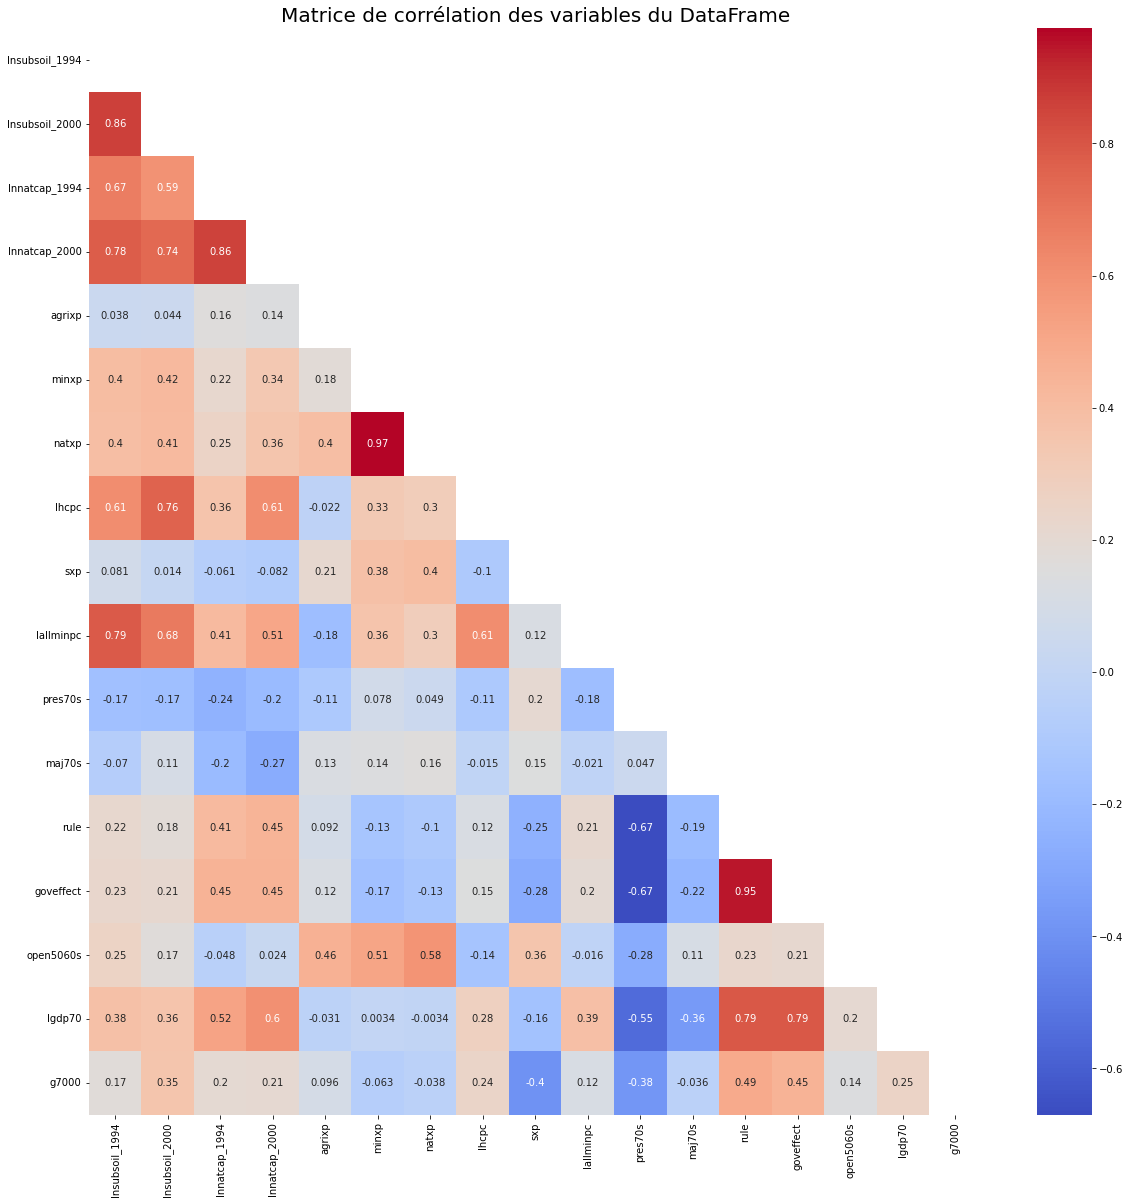

In [86]:
# On produit la matrice de corrélation sous forme de heatmap de notre DataFrame
plt.figure(figsize=(20,20))
# On masque la partie supérieure de la matrice de corrélation avec la diagonale
mask = np.triu(corr)
sns.heatmap(corr, annot=True,cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation des variables du DataFrame",fontsize=20)

On voit que la corrélation de g7000 et les variables lnnatcap_2000 et lnnatcap_1994 sont similaires (0.209 et 0.201). De même on voit que la corrélation de g7000 avec lnsubsoil_1994 et lnsubsoil_2000 sont bien différentes (0.172 et 0.352). Ici les deux variables sont différentes car on regarde sur une période plus grande pour lnsubsoil_2000. On a cependant moins d'observations pour lnsubsoil_1994 (59) contre 72 pour lnsubsoil_2000. On peut cependant supposer que la variable lnsubsoil_2000 et lnnatcap_2000 subissent plus un biais de simultanéité que les variables lnsubsoil_1994 et lnnatcap_1994 car ces deux variables prennent en compte les gdp de l'année 2000 et donc son évolution (constat potentiellement différent avec les variables lnsubsoil_1994 et lnnatcap_1994 qui s'arrêtent en 1994). 

Alors pourquoi estimer qu'il n'y a de biais de simultanéité (ou du moins que ce biais est non significatif) avec g7000 et lnsubsoil_1994 et lnnatcap_1994 ? Dans l'article les auteurs supposent qu'en 1990 l'extraction des ressources n'a pas diminué de manière significative l'abondance des ressources. Ils remarquent aussi que les pays qui produisaient le plus de ressources en 1970 sont toujours le spays avec le plus de ressources en 1990. Ces hypothèses ne peuvent être vérifiées en 2000.

# 2. Regressions

## 2.1 Regression entre les ressources naturelles et la qualité de la gouvernance (Tableau 2)

$$I = a_0 + a_1*\text{conditioning variables}  + a_2*RA + \epsilon$$
with :
- I : institutional quality
- RA : resource abundance

On va effectuer différentes régressions sur les variables suivantes basé sur le tableau page 255:
- rule = f(latitude, lnatcap) correspondant à la colonne 1 du tableau 2
- goveffect = f(latitude, lsubsoil) correspondant à la colonne 4 du tableau 2

On pourra se baser sur les données de 1994.

In [87]:
df = pd.read_excel('DonneÌesBetB.xlsx')

### a. Régression (1)

In [88]:
df_1 = df[["latitude","rule","lnnatcap_1994","afme","eurca","aoc","nam"]].dropna()
df_1 = sm.add_constant(df_1)
model_1 = ols("rule ~ latitude + lnnatcap_1994 + afme + eurca + aoc + nam + const", data=df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rule   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     33.80
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.16e-20
Time:                        14:59:21   Log-Likelihood:                -71.938
No. Observations:                  89   AIC:                             157.9
Df Residuals:                      82   BIC:                             175.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2683      0.315     -4.021      0.000      -1.896      -0.641
latitude          2.5191      0.580      4.343      0.000       1.365       3.673
lnnatcap_1994     0.2154      0.073      2.970      0.004       0.071       0.360
afme              0.0021      0.161      0.013      0.989      -0.318       0.322
eurca             0.8761      0.283      3.091      0.003       0.312       1.440
aoc               0.4466      0.201      2.227      0.029       0.048       0.846
nam               0.8156      0.473      1.724      0.089      -0.126       1.757
const            -1.2683      0.315     -4.021      0.000      -1.896      -0.641
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.773
Skew:                          -0.146   Prob(JB):                        0.679
Kurtosis:                       2.648   Cond. No.                     3.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

On a le même nombre d'observations que le papier.

Au niveau des coefficients, on a:
- Sur la papier, le coeffecient pour la latitude est 2.519 avec une erreur standard de 0.554 tandis que nous avons 4.0454 avec une erreur standard de 0.362
- Sur la papier, le coeffecient pour le capital naturel en 1994 est 0.215 avec une erreur standard de 0.081 tandis que nous avons 0.2227 avec une erreur standard de 0.072

Ils ont un R2 de 0.71 tandis que nous avons 0.665 et un R2 ajusté de 0.658.

Leurs F-stat est de 58.49 tandis que la notre est de 85.51.

Nos résultats s'écartent peut des leurs malgré quelques différences.

**A partir de cette régression, on peut dire que le capital naturel a un impact positif sur la qualité institutionnelle plus particulièrement sur l'application des lois**

### b. Régression (2)

In [89]:
df_2 = df[["latitude","rule","lnsubsoil_1994","afme","eurca","aoc","nam"]].dropna()
df_2 = sm.add_constant(df_2)
model_2 = ols("rule ~ latitude + lnsubsoil_1994 + afme + eurca + aoc + nam + const", data=df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rule   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     30.68
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           5.22e-16
Time:                        14:59:26   Log-Likelihood:                -44.973
No. Observations:                  63   AIC:                             103.9
Df Residuals:                      56   BIC:                             118.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7805      0.149     -5.229      0.000      -1.079      -0.482
latitude           2.9718      0.619      4.799      0.000       1.731       4.212
lnsubsoil_1994     0.1090      0.037      2.925      0.005       0.034       0.184
afme               0.1473      0.196      0.753      0.455      -0.245       0.539
eurca              0.8720      0.319      2.735      0.008       0.233       1.511
aoc                0.5934      0.226      2.629      0.011       0.141       1.046
nam                0.8509      0.464      1.833      0.072      -0.079       1.781
const             -0.7805      0.149     -5.229      0.000      -1.079      -0.482
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.382
Skew:                          -0.186   Prob(JB):                        0.826
Kurtosis:                       3.086   Cond. No.                     2.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### c. Régression (3)

In [90]:
df_3 = df[["latitude","goveffect","lnnatcap_1994","afme","eurca","aoc","nam"]].dropna()
df_3 = sm.add_constant(df_3)
model_3 = ols("goveffect ~ latitude + lnnatcap_1994 + afme + eurca + aoc + nam + const", data=df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              goveffect   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     44.34
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           9.73e-24
Time:                        14:59:30   Log-Likelihood:                -64.305
No. Observations:                  89   AIC:                             142.6
Df Residuals:                      82   BIC:                             160.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2764      0.289     -4.410      0.000      -1.852      -0.701
latitude          2.7064      0.532      5.083      0.000       1.647       3.765
lnnatcap_1994     0.2094      0.067      3.144      0.002       0.077       0.342
afme              0.0020      0.148      0.014      0.989      -0.292       0.296
eurca             0.8962      0.260      3.445      0.001       0.379       1.414
aoc               0.5296      0.184      2.877      0.005       0.163       0.896
nam               0.9315      0.434      2.145      0.035       0.068       1.795
const            -1.2764      0.289     -4.410      0.000      -1.852      -0.701
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.559
Skew:                           0.054   Prob(JB):                        0.756
Kurtosis:                       2.627   Cond. No.                     3.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### d. Régression (4)

In [91]:
df_4 = df[["latitude","goveffect","lnsubsoil_1994","afme","eurca","aoc","nam"]].dropna()
df_4 = sm.add_constant(df_4)
model_4 = ols("goveffect ~ latitude + lnsubsoil_1994 + afme + eurca + aoc + nam + const", data=df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              goveffect   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     29.14
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.52e-15
Time:                        14:59:34   Log-Likelihood:                -45.080
No. Observations:                  63   AIC:                             104.2
Df Residuals:                      56   BIC:                             119.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6680      0.150     -4.468      0.000      -0.967      -0.369
latitude           2.3737      0.620      3.827      0.000       1.131       3.616
lnsubsoil_1994     0.0966      0.037      2.585      0.012       0.022       0.171
afme               0.1432      0.196      0.730      0.468      -0.250       0.536
eurca              1.0906      0.319      3.414      0.001       0.451       1.731
aoc                0.7075      0.226      3.129      0.003       0.255       1.161
nam                1.1973      0.465      2.575      0.013       0.266       2.129
const             -0.6680      0.150     -4.468      0.000      -0.967      -0.369
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.507
Skew:                          -0.211   Prob(JB):                        0.776
Kurtosis:                       2.880   Cond. No.                     2.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

On a le même nombre d'observations que le papier.

Au niveau des coefficients, on a:
- Sur la papier, le coeffecient pour la latitude est 2.374 avec une erreur standard de 0.671 tandis que nous avons 4.2064 avec une erreur standard de 0.381
- Sur la papier, le coeffecient pour le pétrole en 1994 est  0.097 avec une erreur standard de 0.045 tandis que nous avons 0.0709 avec une erreur standard de 0.038

Ils ont un R2 de 0.76 tandis que nous avons 0.680 et un R2 ajusté de 0.670

Leurs F-stat est de 43.73 tandis que la notre est de 63.86

Nos résultats s'écartent peut des leurs malgré quelques différences.

**A partir de cette régression, on peut dire que les ressources minières a un impact positif sur la qualité institutionnelle plus particulièrement sur l'effet gouvernementale**

**On pourrait effectuer d'autres combinaisons mais on obtiendra la même conclusion que l'abondance des ressources a un impact positif sur la qualité institutionnelle**

### e. Régression (5)

In [92]:
df_5 = df[["latitude","rule","lnnatcap_1994","natxp","afme","eurca","aoc","nam"]].dropna()
df_5 = sm.add_constant(df_5)
model_5 = ols("rule ~ latitude + lnnatcap_1994 + natxp + afme + eurca + aoc + nam + const", data=df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rule   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     28.05
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.52e-18
Time:                        14:59:41   Log-Likelihood:                -66.484
No. Observations:                  83   AIC:                             149.0
Df Residuals:                      75   BIC:                             168.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1893      0.360     -3.304      0.001      -1.906      -0.472
latitude          2.6312      0.611      4.304      0.000       1.413       3.849
lnnatcap_1994     0.1935      0.087      2.229      0.029       0.021       0.366
natxp             0.1497      0.729      0.205      0.838      -1.302       1.601
afme             -0.0515      0.169     -0.306      0.761      -0.387       0.284
eurca             0.8432      0.290      2.905      0.005       0.265       1.422
aoc               0.4395      0.202      2.181      0.032       0.038       0.841
nam               0.8116      0.481      1.688      0.096      -0.146       1.769
const            -1.1893      0.360     -3.304      0.001      -1.906      -0.472
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.571
Skew:                          -0.115   Prob(JB):                        0.752
Kurtosis:                       2.665   Cond. No.                     1.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### f. Régression (6)

In [93]:
df_6 = df[["latitude","rule","lnsubsoil_1994","minxp","afme","eurca","aoc","nam"]].dropna()
df_6 = sm.add_constant(df_6)
model_6 = ols("rule ~ latitude + lnsubsoil_1994 + minxp + afme + eurca + aoc + nam + const", data=df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rule   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     26.59
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.21e-15
Time:                        14:59:48   Log-Likelihood:                -42.900
No. Observations:                  61   AIC:                             101.8
Df Residuals:                      53   BIC:                             118.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7687      0.159     -4.849      0.000      -1.087      -0.451
latitude           2.8868      0.632      4.565      0.000       1.618       4.155
lnsubsoil_1994     0.1102      0.047      2.333      0.023       0.015       0.205
minxp             -0.1940      0.822     -0.236      0.814      -1.843       1.455
afme               0.0964      0.212      0.454      0.652      -0.330       0.522
eurca              0.8937      0.320      2.793      0.007       0.252       1.536
aoc                0.5923      0.226      2.620      0.011       0.139       1.046
nam                0.8693      0.468      1.857      0.069      -0.070       1.808
const             -0.7687      0.159     -4.849      0.000      -1.087      -0.451
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.500
Skew:                          -0.194   Prob(JB):                        0.779
Kurtosis:                       3.217   Cond. No.                     4.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### g. Régression (7)

In [94]:
df_7 = df[["latitude","goveffect","lnnatcap_1994","natxp","afme","eurca","aoc","nam"]].dropna()
df_7 = sm.add_constant(df_7)
model_7 = ols("goveffect ~ latitude + lnnatcap_1994 + natxp + afme + eurca + aoc + nam + const", data=df_7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              goveffect   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     34.02
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           7.96e-21
Time:                        14:59:51   Log-Likelihood:                -61.145
No. Observations:                  83   AIC:                             138.3
Df Residuals:                      75   BIC:                             157.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2465      0.338     -3.693      0.000      -1.919      -0.574
latitude          2.4860      0.573      4.336      0.000       1.344       3.628
lnnatcap_1994     0.2079      0.081      2.553      0.013       0.046       0.370
natxp            -0.0982      0.683     -0.144      0.886      -1.459       1.263
afme             -0.0143      0.158     -0.090      0.928      -0.329       0.301
eurca             0.9745      0.272      3.580      0.001       0.432       1.517
aoc               0.5442      0.189      2.880      0.005       0.168       0.921
nam               1.0110      0.451      2.242      0.028       0.113       1.909
const            -1.2465      0.338     -3.693      0.000      -1.919      -0.574
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.419
Skew:                           0.068   Prob(JB):                        0.811
Kurtosis:                       2.679   Cond. No.                     1.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### h. Régression (8)

In [95]:
df_8 = df[["latitude","goveffect","lnsubsoil_1994","minxp","afme","eurca","aoc","nam"]].dropna()
df_8 = sm.add_constant(df_8)
model_8 = ols("goveffect ~ latitude + lnsubsoil_1994 + minxp + afme + eurca + aoc + nam + const", data=df_8).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              goveffect   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     25.32
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           8.47e-15
Time:                        14:59:56   Log-Likelihood:                -43.020
No. Observations:                  61   AIC:                             102.0
Df Residuals:                      53   BIC:                             118.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7175      0.159     -4.517      0.000      -1.036      -0.399
latitude           2.1712      0.634      3.426      0.001       0.900       3.442
lnsubsoil_1994     0.1315      0.047      2.778      0.008       0.037       0.227
minxp             -1.1446      0.824     -1.389      0.171      -2.797       0.508
afme               0.1933      0.213      0.908      0.368      -0.234       0.620
eurca              1.1300      0.321      3.524      0.001       0.487       1.773
aoc                0.7107      0.226      3.138      0.003       0.256       1.165
nam                1.1449      0.469      2.441      0.018       0.204       2.086
const             -0.7175      0.159     -4.517      0.000      -1.036      -0.399
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.520
Skew:                          -0.220   Prob(JB):                        0.771
Kurtosis:                       2.898   Cond. No.                     4.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2.2 Régressions en utilisant des variables instrumentales pour expliquer g7000 (Tableau 4 du papier)

Nous allons réaliser des régressions pour expliquer **g7000** (Log de la croissance du PIB réel par habitant entre 1970 et 2000) avec les variables suivantes :
* **minxp** : Part du PIB dans les exportations annuelles totales de minéraux, définies comme la somme des exportations de combustibles minéraux, de minerais et de métaux, en moyenne sur la période 1970-1989.
* **lsuboil_1994** : Log des actifs du sous-sol, estimés en US$ par habitant pour 1994
* **rule** / **goveffect** : Mesure la qualité de l'exécution des contrats, de la police et des tribunaux, ainsi que la probabilité de crime et de violence en 1996 / Mesure la qualité de la bureaucratie et des services publics en 1996. Recalibré pour prendre des valeurs comprises entre 0 (pire) et 5 (meilleur).
* **lgdp70** : Log du PIB réel par habitant en 1970
On appliquera une variante en remplaçant rule avec goveffect car elles supposent les mêmes effets (indice de qualité institutionnelle) et donc démontrent une robustesse du modèle.

Ces régressions se trouvent à la page 12 (259) de l'article cependant certaines régressions utilisent un modèle 2SLS (modèle que l'on pourra réaliser avec le module IV2SLS).

À partir du point b nous allons réaliser les régressions 2 à 5 qui sont des variantes où l'on utilisera goveffect ou rule (pour tester la robustesse du modèle) avec des variables endogènes différentes.
De plus pour les variables endogènes utilisées, nous allons avoir différentes variables instrumentales. 
Celles-ci sont pour la variable endogène minxp :
* **pres70s** : Indicateur binaire de la forme de gouvernement, codé 1 si le chef de l'exécutif est un président direct ou un président fort élu par une assemblée. Codé 0 si le gouvernement est parlementaire. Valeur pour le début des années 1970
* **open5060s** : Mesure de l'ouverture commerciale (en termes nominaux), définie comme la somme des importations et des exportations par rapport au PIB. Moyenne entre 1950 et 1969

Et celle-là pour les variables endogènes rule et goveffect :
* **latitude** : Valeur absolue de la latitude d'un pays sur une échelle de 0 à 1

In [42]:
col = ["minxp","lgdp70","lnsubsoil_1994","goveffect","rule"]
regional = ["afme","eurca","aoc","nam","csam"]
instrument_1 = ["pres70s","open5060s"]
instrument_2 = ["latitude"]
y_name = ["g7000"]
df1 = df[col+y_name].dropna()
df1 = sm.add_constant(df1)
df2 = df[col+regional+y_name+instrument_1].dropna()
df2 = sm.add_constant(df2)
df3 = df[col+y_name+instrument_2].dropna()
df3 = sm.add_constant(df3)

### a. Régression (1)

In [40]:
# Première régression OLS simple avec minxp et lgdp70
model_1 = ols("g7000 ~ minxp + lgdp70 + const",data=df1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  g7000   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.907
Date:                Mon, 06 Feb 2023   Prob (F-statistic):              0.158
Time:                        14:28:22   Log-Likelihood:                -115.10
No. Observations:                  59   AIC:                             236.2
Df Residuals:                      56   BIC:                             242.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5217      0.907      2.780      0.007       0.705       4.339
minxp         -4.5830      2.554     -1.795      0.078      -9.699       0.533
lgdp70         0.1476      0.251      0.589      0.558      -0.355       0.650
const          2.5217      0.907      2.780      0.007       0.705       4.339
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.415
Skew:                          -0.102   Prob(JB):                        0.493
Kurtosis:                       3.731   Cond. No.                     2.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### b. Régression 2SLS (2)

On rentre en premier lieu la variable que l'on cherche à expliquer nommé **dependent**, ici c'est g7000. Ensuite on rentre les variables exogènes, puis la variable **endogène** et enfin les **instruments** qui est là pour filtrer les informations endogènes de la variables endogène. Cette méthodologie sera appliquée dans l'ensemble des régressions qui suit.

In [43]:
model_2 = IV2SLS(df2["g7000"],df2[["rule","lnsubsoil_1994","lgdp70","const"]],df2[["minxp"]],df2[instrument_1]).fit()
print(model_2)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  g7000   R-squared:                      0.3972
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3517
No. Observations:                  58   F-statistic:                    45.681
Date:                Mon, Feb 06 2023   P-value (F-stat)                0.0000
Time:                        14:33:04   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
rule               1.6219     0.2868     5.6553     0.0000      1.0598      2.1840
lnsubsoil_1994     0.5074     0.1528

In [45]:
model_2.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 3.5349
P-value: 0.0657
Distributed: F(1,52)
WaldTestStatistic, id: 0x7f9ca4ac5a90

### c. Régression 2SLS (3)

In [18]:
model_3 = IV2SLS(df2["g7000"],df2[["goveffect","lnsubsoil_1994","lgdp70",'const']],df2["minxp"],df2[instrument_1]).fit()
print(model_3)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  g7000   R-squared:                      0.3361
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2860
No. Observations:                  58   F-statistic:                    47.064
Date:                Mon, Feb 06 2023   P-value (F-stat)                0.0000
Time:                        14:18:06   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
goveffect          1.3385     0.2747     4.8734     0.0000      0.8002      1.8768
lnsubsoil_1994     0.4628     0.1449

### d. Régression 2SLS (4)

In [46]:
model_4 = IV2SLS(df3["g7000"],df3[['minxp',"lnsubsoil_1994","lgdp70",'const']],df3["rule"],df3[instrument_2]).fit()
print(model_4)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  g7000   R-squared:                      0.4346
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3927
No. Observations:                  59   F-statistic:                    29.292
Date:                Mon, Feb 06 2023   P-value (F-stat)                0.0000
Time:                        14:34:35   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
minxp             -4.7155     4.4138    -1.0684     0.2854     -13.366      3.9354
lnsubsoil_1994     0.4054     0.1402

In [47]:
model_4.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 0.3630
P-value: 0.5494
Distributed: F(1,53)
WaldTestStatistic, id: 0x7f9ca473b160

### e. Régression 2SLS (5)

In [20]:
model_5 = IV2SLS(df3["g7000"],df3[['minxp',"lnsubsoil_1994","lgdp70",'const']],df3["goveffect"],df3[instrument_2]).fit()
print(model_5)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  g7000   R-squared:                      0.3356
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2864
No. Observations:                  59   F-statistic:                    27.197
Date:                Mon, Feb 06 2023   P-value (F-stat)                0.0000
Time:                        14:18:15   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
minxp             -2.3050     4.1802    -0.5514     0.5814     -10.498      5.8881
lnsubsoil_1994     0.3429     0.1284

### Conclusion

## 3. Régressions 3SLS (Tableau 5)

In [31]:
col = ["minxp","lgdp70","lnsubsoil_1994","goveffect","rule","pres70s","open5060s","latitude"]
regional = ["afme","eurca","aoc","nam","csam"]
y_name = ["g7000"]
df3SLS = df[col+y_name].dropna()
df3SLS = sm.add_constant(df3SLS)
df3SLS = df3SLS.rename(columns={"const":"constG"})
df3SLS = sm.add_constant(df3SLS,has_constant="add")
df3SLS = df3SLS.rename(columns={"const":"constM"})
df3SLS = sm.add_constant(df3SLS,has_constant="add")
df3SLS = df3SLS.rename(columns={"const":"constR"})

In [62]:
df3SLS.head()

,constR,constM,constG,minxp,lgdp70,lnsubsoil_1994,goveffect,rule,pres70s,open5060s,latitude,g7000
5,1.0,1.0,1.0,0.003219,7.927007,6.253829,0.45,0.28,1.0,0.122590,0.38,4.809399
7,1.0,1.0,1.0,0.039060,8.407646,9.113830,1.96,1.89,0.0,0.314465,0.30,6.010288
8,1.0,1.0,1.0,0.010799,8.141568,5.438079,1.92,1.98,0.0,0.446490,0.52,6.594900
12,1.0,1.0,1.0,0.000673,5.797637,2.995732,-0.67,-0.68,0.0,0.191264,0.27,5.608288
15,1.0,1.0,1.0,0.058903,8.215321,2.302585,1.78,1.65,0.0,0.806015,0.56,6.372166


In [32]:
model_str_1 = "g7000 ~ [minxp ~ pres70s + lnsubsoil_1994 + rule + open5060s + constM] + lnsubsoil_1994 + lgdp70 + [rule ~ latitude + lnsubsoil_1994 + constR] + constG"

In [33]:
model_3SLS_1 = IV2SLS.from_formula(model_str_1,df3SLS)
model_3SLS_res_1 = model_3SLS_1.fit(cov_type="unadjusted")
print(model_3SLS_res_1)

ValueError: instruments [exog instruments]  do not have full column rank